In [1]:
import mujoco
from PIL import Image
from IPython.display import display
import cv2
import importlib
import numpy as np

from robosuite.models.objects import BallObject, BoxObject

from PIL import Image
from IPython.display import display

[robosuite WARNING] No private macro file found! (__init__.py:7)
[robosuite WARNING] It is recommended to use a private macro file (__init__.py:8)
[robosuite WARNING] To setup, run: python /home/user/anaconda3/envs/robosuite/lib/python3.9/site-packages/robosuite/scripts/setup_macros.py (__init__.py:9)


In [2]:
import bricks_dataset.brick_envs.wall_env as wall_env

In [3]:
import bricks_dataset.brick_envs.bricks_base_env as bricks_base_env

In [4]:
import importlib

In [5]:
importlib.reload(wall_env)
importlib.reload(bricks_base_env)

<module 'bricks_dataset.brick_envs.bricks_base_env' from '/home/user/Documents/projects/robosuite-notebooks/bricks_dataset/brick_envs/bricks_base_env.py'>

In [5]:
import yaml
import os

In [6]:
config_path = bricks_base_env.config_path_default

In [7]:
with open(config_path, mode="rt", encoding="utf-8") as file:
    config = yaml.safe_load(file)

In [8]:
config

{'bricks_base_env_config': {'table': {'full_size': [0.8, 0.8, 0.05],
   'friction': [1.0, 0.005, 0.0001],
   'offset': [0, 0, 0.8]}},
 'single_arm_env_config': {'env_configuration': 'default',
  'initialization_noise': 'default',
  'robots': 'Panda',
  'gripper_types': 'default',
  'use_camera_obs': True,
  'has_renderer': False,
  'has_offscreen_renderer': True,
  'render_camera': 'frontview',
  'render_collision_mesh': False,
  'render_visual_mesh': True,
  'render_gpu_device_id': -1,
  'control_freq': 20,
  'horizon': 1000,
  'ignore_done': False,
  'hard_reset': True,
  'camera_names': 'agentview',
  'camera_heights': 256,
  'camera_widths': 256,
  'camera_depths': False,
  'renderer': 'mujoco'}}

## Generative Env

In [10]:
import bricks_dataset.brick_envs.chair_env as chair_env

In [10]:
import bricks_dataset.brick_envs.generative_env as generative_env

In [13]:
importlib.reload(generative_env)

<module 'bricks_dataset.brick_envs.generative_env' from '/home/user/Documents/projects/robosuite-notebooks/bricks_dataset/brick_envs/generative_env.py'>

In [15]:
env = generative_env.GenerativeEnv(2, (1, 20, 1), (4, 4))

In [14]:
env = chair_env.ChairEnv()

In [18]:
env.go_to_step(4)

In [14]:
env.brick_shapes

{1: (1, 3, 1),
 2: (1, 1, 1),
 3: (1, 8, 1),
 4: (1, 1, 1),
 5: (1, 1, 1),
 6: (1, 3, 1),
 0: (4, 4, 1)}

In [16]:
colors = env.get_random_brick_colors()
env.set_brick_colors(colors)
o = env.reset()

In [17]:
colors

['flat_dark_orange', 'web_safe_muddy_green', 'material_pink']

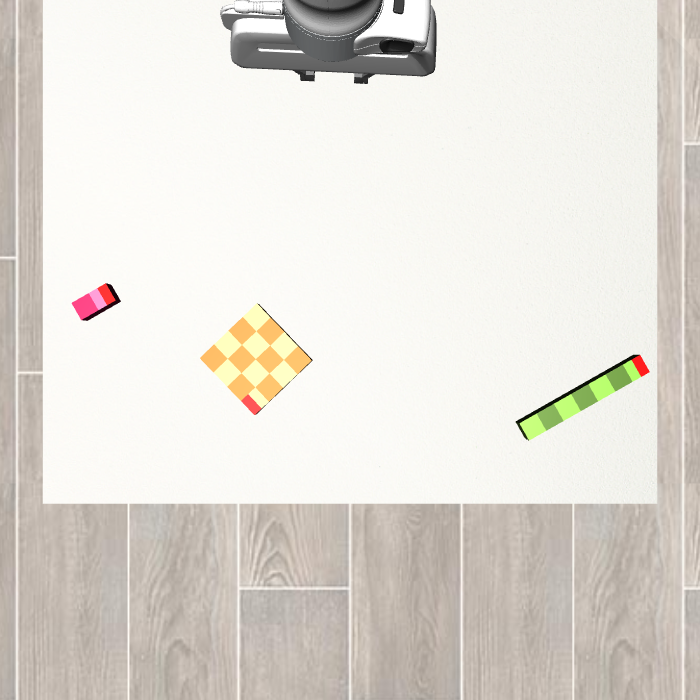

In [18]:
env_img = env.sim.render(700, 700, camera_name="birdview")
display(Image.fromarray(cv2.rotate(env_img, cv2.ROTATE_180)))

In [21]:
env.go_to_step(1)

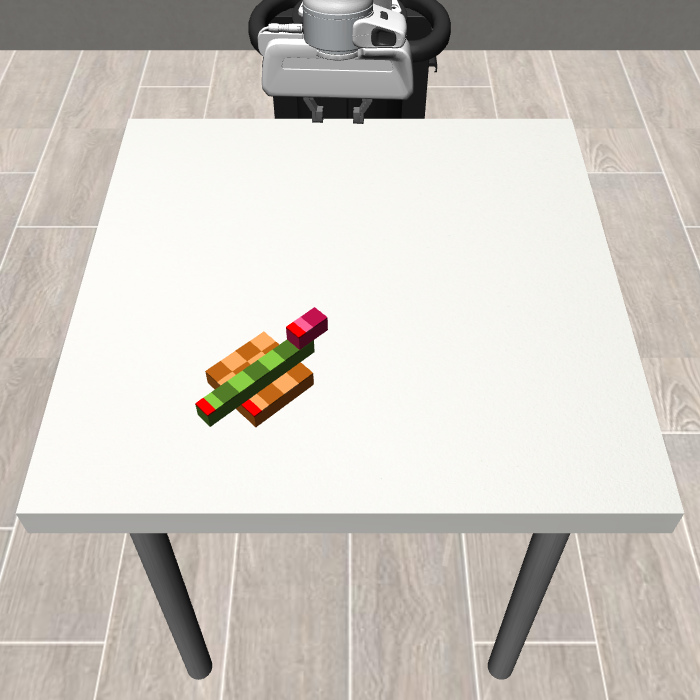

In [23]:
env_img = env.sim.render(700, 700, camera_name="frontview")
display(Image.fromarray(cv2.rotate(env_img, cv2.ROTATE_180)))

In [19]:
[[1, 2, 3]] * 3

[[1, 2, 3], [1, 2, 3], [1, 2, 3]]

In [20]:
[1, 2, 3, *[1, 2, 3]]

[1, 2, 3, 1, 2, 3]

In [ ]:
env.sim.forward()

In [30]:
camera_name = "frontview"
cam_id = env.sim.model.camera_name2id(camera_name)
camera_pos = env.sim.data.cam_xpos[cam_id]

In [ ]:
env.set_camera_pos_quat(

In [39]:
from pyquaternion import Quaternion

In [89]:
cam = env.sim.model.camera(cam_id)
cam.pos = np.array([0.9, 0, 1.7])
qx = Quaternion(axis=[1, 0, 0], angle=40/360*2*np.pi)
qy = Quaternion(axis=[0, 0, 1], angle=90/360*2*np.pi)
cam.quat = (qy * qx).elements
env.sim.forward()

In [37]:
np.arange(3)[::-1]

array([2, 1, 0])

In [36]:
cam

<_MjModelCameraViews
  bodyid: array([0], dtype=int32)
  fovy: array([45.])
  id: 0
  ipd: array([0.068])
  mat0: array([-5.55111512e-17, -2.58174524e-01,  9.66098295e-01,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.66098295e-01,
        2.58174524e-01])
  mode: array([0], dtype=int32)
  name: 'frontview'
  pos: array([1. , 0. , 1.3])
  pos0: array([1.6 , 0.  , 1.45])
  poscom0: array([2.21245021e+00, 3.32572533e-22, 9.57700503e-01])
  quat: array([0.56084189, 0.43064645, 0.43064645, 0.56084189])
  targetbodyid: array([-1], dtype=int32)
  user: array([], dtype=float64)
>

In [73]:
camera_pos

array([1.6 , 0.  , 1.45])

In [16]:
env.sim.data.cam_xpos[cam_id] = camera_pos - np.array([1, 0, 0])

In [86]:
env.sim.data.cam_xmat[cam_id] = q.rotation_matrix.flatten()

In [80]:
q = Quaternion(matrix=env.sim.data.cam_xmat[cam_id].reshape(3, 3))

In [81]:
q

Quaternion(0.5608418947374367, 0.43064645488767467, 0.43064645488767467, 0.5608418947374367)

In [89]:
q = Quaternion(axis=[0, 1, 0], angle=1/10/2*np.pi)

In [83]:
q.rotation_matrix

array([[ 0.98078528,  0.        ,  0.19509032],
       [ 0.        ,  1.        ,  0.        ],
       [-0.19509032,  0.        ,  0.98078528]])

In [91]:
env.sim.forward()

In [ ]:
env.model.mujoco_arena.set_camera

## Wall Env

In [13]:
import bricks_dataset.brick_envs.chair_env as chair_env

In [14]:
import bricks_dataset.brick_envs.floor_env as floor_env

In [15]:
import bricks_dataset.brick_envs.wall_env as wall_env

In [16]:
import bricks_dataset.brick_envs.tower2d_env as tower2d_env

In [17]:
import bricks_dataset.brick_envs.tower3d_env as tower3d_env

In [18]:
import bricks_dataset.brick_envs.pyramid2d_env as pyramid2d_env

In [19]:
import bricks_dataset.brick_envs.pyramid3d_env as pyramid3d_env

In [20]:
import bricks_dataset.brick_envs.bridge_env as bridge_env

In [21]:
import bricks_dataset.brick_envs.box_env as box_env

In [22]:
import bricks_dataset.brick_envs.pick_place_env as pick_place_env

In [23]:
env = floor_env.FloorEnv()

In [24]:
colors = env.get_random_brick_colors()
env.set_brick_colors(colors)
o = env.reset()

In [33]:
a = np.moveaxis([np.ones((3,3,1)), np.ones((3,3,1))], 3, 2)

In [34]:
a.shape

(2, 3, 1, 3)

In [29]:
colors

['web_safe_green',
 'material_brown',
 'flat_dark_purple',
 'web_safe_muddy_orange',
 'flat_yellow',
 'web_safe_muddy_brown_green',
 'flat_light_turquoise',
 'material_purple',
 'web_safe_muddy_green',
 'flat_dark_green',
 'flat_dark_orange']

In [27]:
env = chair_env.ChairEnv()

In [19]:
env = wall_env.WallEnv()

In [37]:
env = tower2d_env.Tower2DEnv()

In [44]:
env = tower3d_env.Tower3DEnv()

In [62]:
env = pyramid2d_env.Pyramid2DEnv()

In [17]:
env = pyramid3d_env.Pyramid3DEnv()

In [19]:
env = bridge_env.BridgeEnv()

In [23]:
env = box_env.BoxEnv()

In [26]:
keyframe_data = env.get_keyframe_data()

In [27]:
keyframe_data["images"][0].shape

(300, 300, 3)

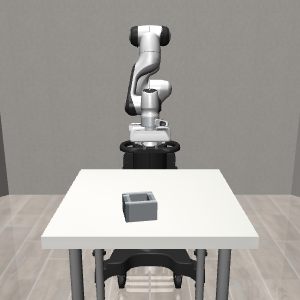

In [28]:
display(Image.fromarray(cv2.rotate(keyframe_data["images"][4], cv2.ROTATE_180)))

In [42]:
env = pick_place_env.PickPlaceEnv()

In [37]:
o = env.reset()

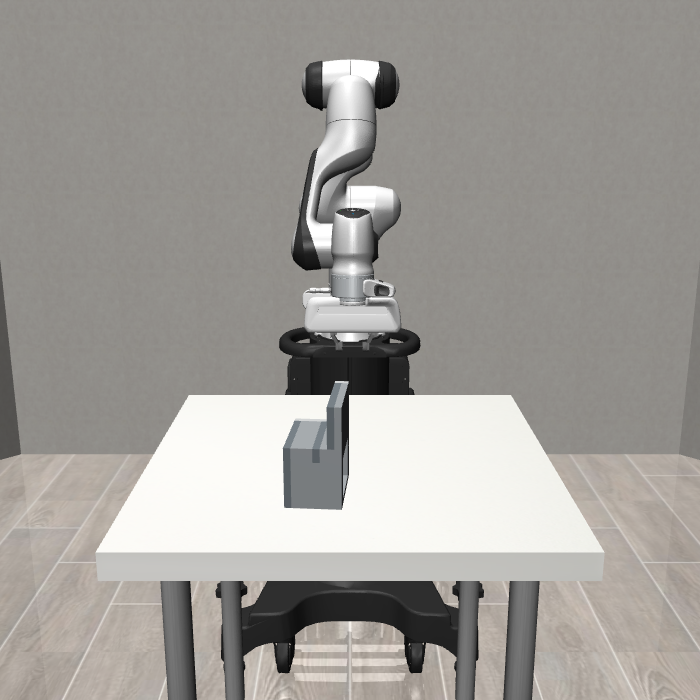

In [36]:
env_img = env.sim.render(700, 700, camera_name="frontview")
display(Image.fromarray(cv2.rotate(env_img, cv2.ROTATE_180)))

In [35]:
env.go_to_step(4)

In [35]:
env.bricks[2]._visual_geoms

['g0_vis', 'g1_vis', 'g2_vis']

In [50]:
%timeit env.bricks[2]._get_object_subtree()

101 µs ± 991 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [49]:
env.bricks[2]._obj[7]

<Element 'geom' at 0x151b90e50>

In [ ]:
env.model.rgb

In [18]:
env.sim.data._model.geom('cube_1_g2_vis').rgba = (1, 0, 0, 1)

In [26]:
env.bricks[0].geom_rgbas[0] = (0, 0, 1, 1)
env.sim.forward()

In [23]:
env.sim.model.geom_name2id('cube_1')

ValueError: No "geom" with name cube_1 exists. Available "geom" names = ('floor', 'wall_leftcorner_visual', 'wall_rightcorner_visual', 'wall_left_visual', 'wall_right_visual', 'wall_rear_visual', 'wall_front_visual', 'table_collision', 'table_visual', 'table_leg1_visual', 'table_leg2_visual', 'table_leg3_visual', 'table_leg4_visual', 'robot0_g0_vis', 'robot0_g1_vis', 'robot0_g2_vis', 'robot0_g3_vis', 'robot0_g4_vis', 'robot0_g5_vis', 'robot0_g6_vis', 'robot0_g7_vis', 'robot0_g8_vis', 'robot0_g9_vis', 'robot0_g10_vis', 'robot0_g11_vis', 'robot0_link0_collision', 'robot0_g12_vis', 'robot0_link1_collision', 'robot0_g13_vis', 'robot0_link2_collision', 'robot0_g14_vis', 'robot0_g15_vis', 'robot0_g16_vis', 'robot0_g17_vis', 'robot0_link3_collision', 'robot0_g18_vis', 'robot0_g19_vis', 'robot0_g20_vis', 'robot0_g21_vis', 'robot0_link4_collision', 'robot0_g22_vis', 'robot0_g23_vis', 'robot0_g24_vis', 'robot0_link5_collision', 'robot0_g25_vis', 'robot0_g26_vis', 'robot0_g27_vis', 'robot0_g28_vis', 'robot0_g29_vis', 'robot0_g30_vis', 'robot0_g31_vis', 'robot0_g32_vis', 'robot0_g33_vis', 'robot0_g34_vis', 'robot0_g35_vis', 'robot0_g36_vis', 'robot0_g37_vis', 'robot0_g38_vis', 'robot0_g39_vis', 'robot0_g40_vis', 'robot0_g41_vis', 'robot0_link6_collision', 'robot0_g42_vis', 'robot0_g43_vis', 'robot0_g44_vis', 'robot0_g45_vis', 'robot0_g46_vis', 'robot0_g47_vis', 'robot0_g48_vis', 'robot0_g49_vis', 'gripper0_hand_visual', 'gripper0_hand_collision', 'gripper0_finger1_visual', 'gripper0_finger1_collision', 'gripper0_finger1_pad_collision', 'gripper0_finger2_visual', 'gripper0_finger2_collision', 'gripper0_finger2_pad_collision', 'mount0_controller_box_col', 'mount0_pedestal_feet_col', 'mount0_torso_vis', 'mount0_pedestal_vis', 'mount0_pedestal_col', 'cube_1_g0', 'cube_1_g0_vis', 'cube_1_g1', 'cube_1_g1_vis', 'cube_1_g2', 'cube_1_g2_vis', 'cube_2_g0', 'cube_2_g0_vis', 'cube_2_g1', 'cube_2_g1_vis', 'cube_2_g2', 'cube_2_g2_vis', 'cube_3_g0', 'cube_3_g0_vis', 'cube_3_g1', 'cube_3_g1_vis', 'cube_3_g2', 'cube_3_g2_vis', 'cube_4_g0', 'cube_4_g0_vis', 'cube_4_g1', 'cube_4_g1_vis', 'cube_4_g2', 'cube_4_g2_vis', 'cube_5_g0', 'cube_5_g0_vis', 'cube_5_g1', 'cube_5_g1_vis', 'cube_5_g2', 'cube_5_g2_vis').

In [ ]:
env.go_to_step(1)

In [ ]:
env.brick_placements

In [ ]:
env._assemble_bricks(2,(3,3),0,0,3)
env._assemble_bricks(2,(1,0),1,0,0)

In [ ]:
for i in range(50):
    o = env.step(np.zeros(8))

In [ ]:
[0,0] + [1]

## Test Texture

In [ ]:
# add object to env

def reinit_env(env):
    # Load the model
    # self._load_model()
    
    # Initialize the simulation
    env._initialize_sim()

    # initializes the rendering
    env.initialize_renderer()

    # Run all further internal (re-)initialization required
    env._reset_internal()

    # Load observables
    if hasattr(env.viewer, "_setup_observables"):
        env._observables = env.viewer._setup_observables()
    else:
        env._observables = env._setup_observables()
        
    # check if viewer has get observations method and set a flag for future use.
    env.viewer_get_obs = hasattr(env.viewer, "_get_observations")

In [ ]:
from robosuite.utils.mjcf_utils import CustomMaterial

In [ ]:
env = wall_env.WallEnv()
tex_attrib = {
    "type": "cube",
    "builtin": "checker"
}
mat_attrib = {
    "texrepeat": "1 1",
    "specular": "0.4",
    "shininess": "0.1",
}
test_cube_material = CustomMaterial(
    texture="WoodRed",
    tex_name="redwood",
    mat_name="redwood_mat",
    tex_attrib=tex_attrib,
    mat_attrib=mat_attrib,
)
tex_attrib = {
    "type": "cube",
}
mat_attrib = {
    "texrepeat": "1 1",
    "specular": "0.4",
    "shininess": "0.1",
}
redwood = CustomMaterial(
    texture="WoodRed",
    tex_name="redwood",
    mat_name="redwood_mat",
    tex_attrib=tex_attrib,
    mat_attrib=mat_attrib,
)
test_cube = BoxObject(
    name="test_cube",
    density=200,
    size=[0.04, 0.04, 0.04],
    # rgba=(0,0,1,1),
    material=redwood,
)
test_cube_obj = test_cube.get_obj()
test_cube_obj.set('pos', f'0.0 0.0 {0.8 + 0.2}')
env.model.worldbody.append(test_cube_obj)
reinit_env(env)